In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn yfinance

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ishit\\Downloads\\anaconda\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open     Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD
Date                                                                     
2017-01-01   998.325012  1003.080017   958.698975   963.658020  147775008
2017-01-02  1021.750000  1031.390015   996.702026   998.617004  222184992
2017-01-03  1043.839966  1044.079956  1021.599976  1021.599976  185168000
2017-01-04  1154.729980  1159.420044  1044.400024  1044.400024  344945984
2017-01-05  1013.380005  1191.099976   910.416992  1156.729980  510199008


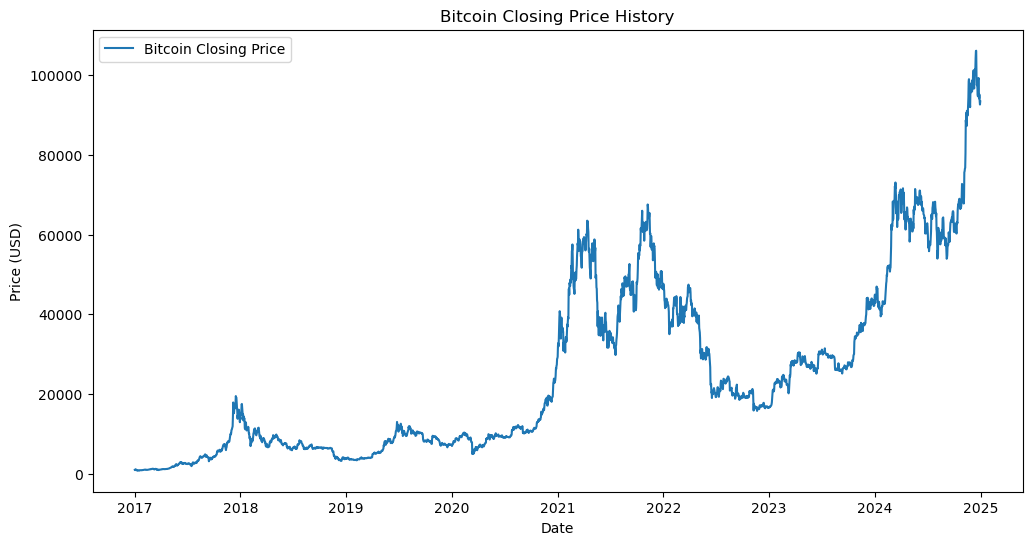

In [3]:
import yfinance as yf

# Fetch historical Bitcoin price data
btc = yf.download('BTC-USD', start='2017-01-01', end='2025-01-01')
print(btc.head())

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(btc['Close'], label='Bitcoin Closing Price')
plt.title('Bitcoin Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.show()

In [4]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc[['Close']].values)

# Create sequences for training
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Set time step
time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# Split into training and testing data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

C:\Users\ishit\Downloads\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0090 - val_loss: 0.0016
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.5384e-04 - val_loss: 0.0014
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.5794e-04 - val_loss: 0.0028
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 6.9492e-04 - val_loss: 8.3794e-04
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.7407e-04 - val_loss: 0.0010
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.9890e-04 - val_loss: 0.0020
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.6086e-04 - val_loss: 0.0013
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.2363e-04 - val_loss: 8.6932e-04
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.8384e-04 - val_loss: 0.0011
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.4108e-04 - val_loss: 7.2594e-04
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 4.3057e-04 - val_loss: 8.1566e-04
Epoch 

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


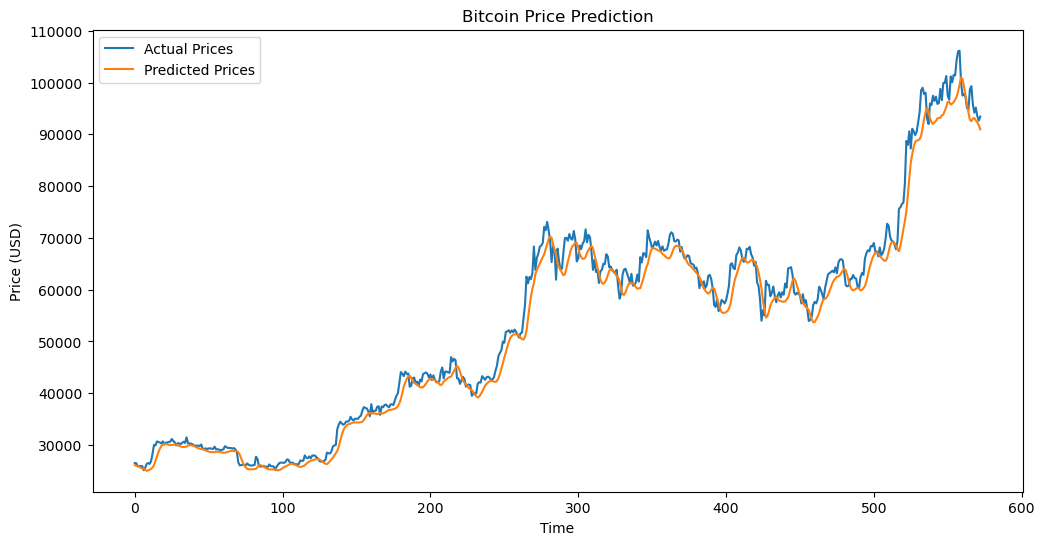

In [8]:
# Predict prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Rescale to original values

# Rescale actual values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [12]:
# Set a price drop threshold (e.g., 5%)
threshold = 0.05

# Check for price drops larger than the threshold
btc['PriceDrop'] = btc['Close'].pct_change() < -threshold

# Print dates where a significant drop occurred
alert_dates = btc[btc['PriceDrop'] == True].index
print(f"Price Drop Alerts on: {alert_dates}")

Price Drop Alerts on: DatetimeIndex(['2017-01-05', '2017-01-06', '2017-01-11', '2017-02-09',
               '2017-03-08', '2017-03-10', '2017-03-17', '2017-03-18',
               '2017-03-22', '2017-03-24',
               ...
               '2024-03-19', '2024-04-02', '2024-04-13', '2024-04-30',
               '2024-07-04', '2024-08-02', '2024-08-05', '2024-08-27',
               '2024-11-25', '2024-12-18'],
              dtype='datetime64[ns]', name='Date', length=194, freq=None)


In [13]:
# Calculate daily returns (percentage change)
btc['Returns'] = btc['Close'].pct_change()

# Calculate rolling volatility (using a 7-day window for example)
btc['Volatility'] = btc['Returns'].rolling(window=7).std() * np.sqrt(7)

# Set a volatility threshold (e.g., 10% daily volatility)
volatility_threshold = 0.1

# Check for volatility spikes
btc['VolatilityAlert'] = btc['Volatility'] > volatility_threshold

# Print dates with volatility spikes
alert_dates_volatility = btc[btc['VolatilityAlert'] == True].index
print(f"Volatility Spike Alerts on: {alert_dates_volatility}")

Volatility Spike Alerts on: DatetimeIndex(['2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15',
               '2017-01-16', '2017-01-17',
               ...
               '2024-08-14', '2024-08-27', '2024-11-06', '2024-11-11',
               '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15',
               '2024-11-16', '2024-11-17'],
              dtype='datetime64[ns]', name='Date', length=845, freq=None)


In [18]:
# Calculate daily returns (percentage change)
btc['Returns'] = btc['Close'].pct_change()

# Calculate rolling volatility (using a 7-day window for example)
btc['Volatility'] = btc['Returns'].rolling(window=7).std() * np.sqrt(7)

# Set a volatility threshold (e.g., 10% daily volatility)
volatility_threshold = 0.1

# Check for volatility spikes
btc['VolatilityAlert'] = btc['Volatility'] > volatility_threshold

# Print dates with volatility spikes

alert_dates_volatility = btc[btc['VolatilityAlert'] == True].index
print(f"Volatility Spike Alerts on: {alert_dates_volatility}")

Volatility Spike Alerts on: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [20]:
# Check column names
print(btc.columns)

# Check data types
print(btc.dtypes)

# Check for missing values
print(btc.isnull().sum())

# Create a composite alert system
btc['RiskAlert'] = (btc['PriceDrop'] | btc['VolatilityAlert'] | btc['VolumeAlert'])

# Print dates when any risk alert occurs
risk_alert_dates = btc[btc['RiskAlert'] == True].index
print(f"Risk Alerts on: {risk_alert_dates}")


MultiIndex([(          'Close', 'BTC-USD'),
            (           'High', 'BTC-USD'),
            (            'Low', 'BTC-USD'),
            (           'Open', 'BTC-USD'),
            (         'Volume', 'BTC-USD'),
            (      'PriceDrop',        ''),
            (        'Returns',        ''),
            (     'Volatility',        ''),
            ('VolatilityAlert',        '')],
           names=['Price', 'Ticker'])
Price            Ticker 
Close            BTC-USD    float64
High             BTC-USD    float64
Low              BTC-USD    float64
Open             BTC-USD    float64
Volume           BTC-USD      int64
PriceDrop                      bool
Returns                     float64
Volatility                  float64
VolatilityAlert                bool
dtype: object
Price            Ticker 
Close            BTC-USD       0
High             BTC-USD       0
Low              BTC-USD       0
Open             BTC-USD       0
Volume           BTC-USD       0
PriceDrop   

KeyError: 'VolumeAlert'

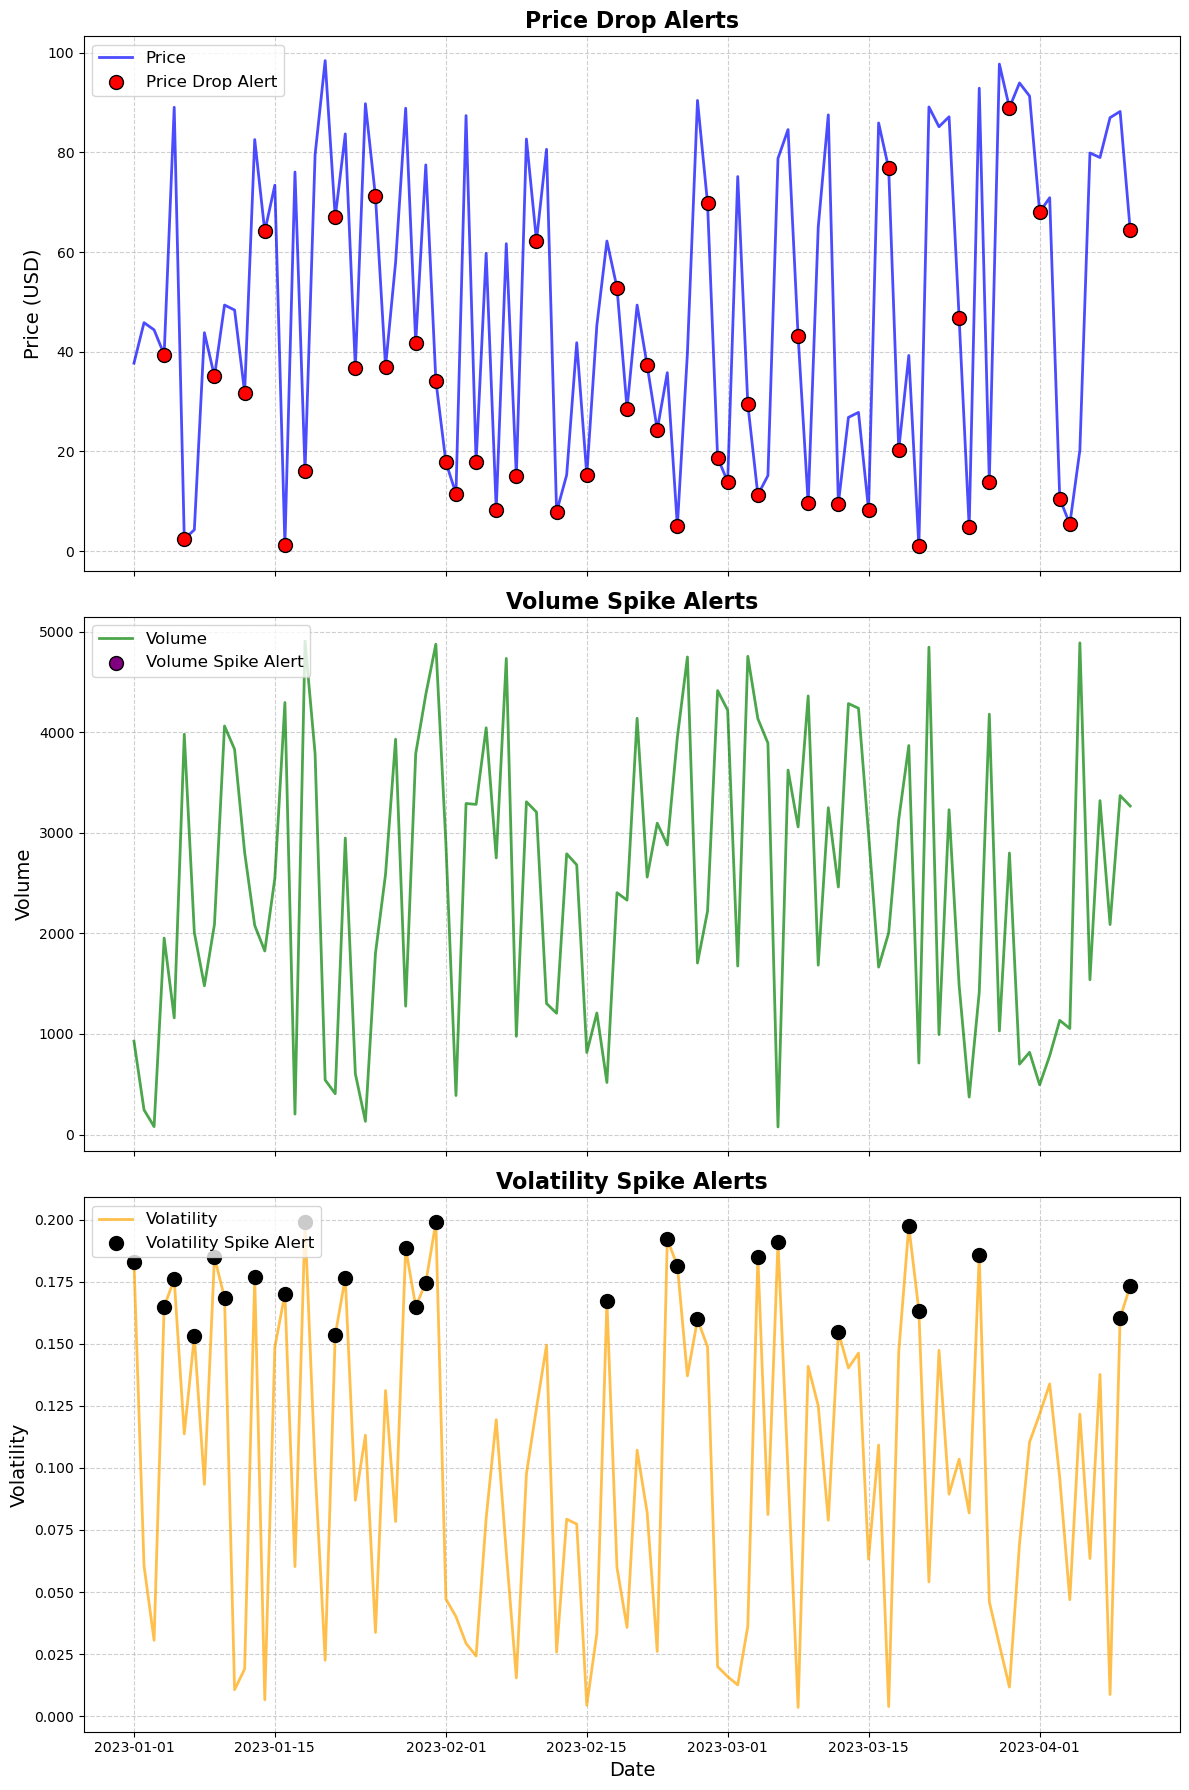

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some example data for illustration (you would use your actual data)
import pandas as pd
import numpy as np

# Example: Creating a mock dataset similar to yours
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
price_data = np.random.rand(100) * 100  # Simulating random price data
volume_data = np.random.rand(100) * 5000  # Simulating random volume data
volatility_data = np.random.rand(100) * 0.2  # Simulating random volatility data

# Create DataFrame
btc = pd.DataFrame({
    'Date': dates,
    'Close': price_data,
    'Volume': volume_data,
    'Volatility': volatility_data,
})

# Create alert columns (use your conditions from the previous section)
btc['PriceDrop'] = btc['Close'].pct_change() < -0.05  # 5% drop alert
btc['VolatilityAlert'] = btc['Volatility'] > 0.15  # Volatility spike alert
btc['VolumeAlert'] = btc['Volume'] > btc['Volume'].mean() * 2  # Volume spike alert
btc['RiskAlert'] = btc['PriceDrop'] | btc['VolatilityAlert'] | btc['VolumeAlert']  # Combined risk alert

# Set up the figure and axes for the plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot price data (closing price) with price drop alerts
axes[0].plot(btc['Date'], btc['Close'], label='Price', color='blue', alpha=0.7, linewidth=2)
axes[0].scatter(btc[btc['PriceDrop']]['Date'], btc[btc['PriceDrop']]['Close'], color='red', label='Price Drop Alert', zorder=5, s=100, edgecolor='k')
axes[0].set_title("Price Drop Alerts", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Price (USD)", fontsize=14)
axes[0].legend(loc="upper left", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot volume data with volume spike alerts
axes[1].plot(btc['Date'], btc['Volume'], label='Volume', color='green', alpha=0.7, linewidth=2)
axes[1].scatter(btc[btc['VolumeAlert']]['Date'], btc[btc['VolumeAlert']]['Volume'], color='purple', label='Volume Spike Alert', zorder=5, s=100, edgecolor='k')
axes[1].set_title("Volume Spike Alerts", fontsize=16, fontweight='bold')
axes[1].set_ylabel("Volume", fontsize=14)
axes[1].legend(loc="upper left", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Plot volatility data with volatility spike alerts
axes[2].plot(btc['Date'], btc['Volatility'], label='Volatility', color='orange', alpha=0.7, linewidth=2)
axes[2].scatter(btc[btc['VolatilityAlert']]['Date'], btc[btc['VolatilityAlert']]['Volatility'], color='black', label='Volatility Spike Alert', zorder=5, s=100, edgecolor='k')
axes[2].set_title("Volatility Spike Alerts", fontsize=16, fontweight='bold')
axes[2].set_xlabel("Date", fontsize=14)
axes[2].set_ylabel("Volatility", fontsize=14)
axes[2].legend(loc="upper left", fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)

# Improve the layout
plt.tight_layout()
plt.show()


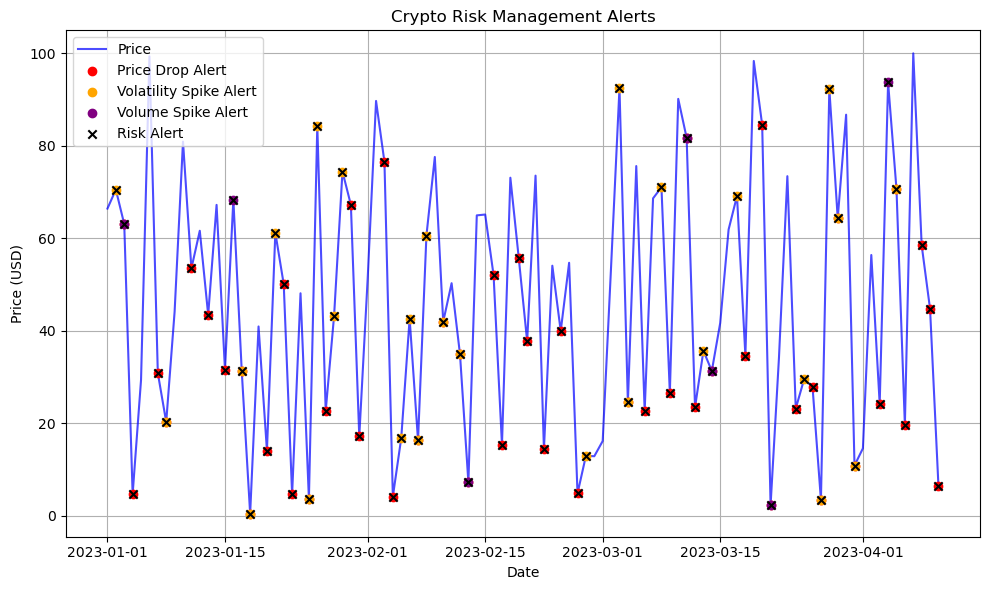

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some example data for illustration (you would use your actual data)
import pandas as pd
import numpy as np

# Example: Creating a mock dataset similar to yours
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
price_data = np.random.rand(100) * 100  # Simulating random price data
volume_data = np.random.rand(100) * 5000  # Simulating random volume data
volatility_data = np.random.rand(100) * 0.2  # Simulating random volatility data

# Create DataFrame
btc = pd.DataFrame({
    'Date': dates,
    'Close': price_data,
    'Volume': volume_data,
    'Volatility': volatility_data,
})

# Create alert columns (use your conditions from the previous section)
btc['PriceDrop'] = btc['Close'].pct_change() < -0.05  # 5% drop alert
btc['VolatilityAlert'] = btc['Volatility'] > 0.15  # Volatility spike alert
btc['VolumeAlert'] = btc['Volume'] > btc['Volume'].mean() * 2  # Volume spike alert
btc['RiskAlert'] = btc['PriceDrop'] | btc['VolatilityAlert'] | btc['VolumeAlert']  # Combined risk alert

# Set up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot price data (closing price)
ax.plot(btc['Date'], btc['Close'], label='Price', color='blue', alpha=0.7)

# Plot risk alerts
ax.scatter(btc[btc['PriceDrop']]['Date'], btc[btc['PriceDrop']]['Close'], color='red', label='Price Drop Alert', zorder=5)
ax.scatter(btc[btc['VolatilityAlert']]['Date'], btc[btc['VolatilityAlert']]['Close'], color='orange', label='Volatility Spike Alert', zorder=5)
ax.scatter(btc[btc['VolumeAlert']]['Date'], btc[btc['VolumeAlert']]['Close'], color='purple', label='Volume Spike Alert', zorder=5)
ax.scatter(btc[btc['RiskAlert']]['Date'], btc[btc['RiskAlert']]['Close'], color='black', label='Risk Alert', zorder=5, marker='x')

# Customize the chart
ax.set_title("Crypto Risk Management Alerts")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.legend(loc="upper left")
ax.grid(True)

# Show the chart
plt.tight_layout()
plt.show()

In [9]:
model.save('bitcoin_price_prediction_model.h5')